In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available
import seaborn as sns
%matplotlib inline
import folium
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
confirmed_df = pd.read_csv('/content/drive/MyDrive/cricket/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('/content/drive/MyDrive/cricket/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('/content/drive/MyDrive/cricket/time_series_covid19_recovered_global.csv')

NameError: name 'pd' is not defined

In [ ]:
# shape of dataframe
print(confirmed_df.shape)
print(deaths_df.shape)
print(recoveries_df.shape)

(266, 178)
(266, 178)
(253, 178)


In [ ]:
#Information of Confirmed Cases Dataset
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 178 entries, Province/State to 7/13/20
dtypes: float64(2), int64(174), object(2)
memory usage: 370.0+ KB


In [ ]:
#Statistical details of confirmed cases dataset
confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,4.236509e+04,4.305337e+04,4.368457e+04,4.447219e+04,4.526872e+04,4.612225e+04,4.698672e+04,4.781168e+04,4.853518e+04,4.926463e+04
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,2.115818e+05,2.152661e+05,2.185190e+05,2.232169e+05,2.278585e+05,2.327247e+05,2.378347e+05,2.425360e+05,2.467222e+05,2.508038e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.075000e+02,2.075000e+02,2.092500e+02,2.285000e+02,2.347500e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.223500e+03,1.232000e+03,1.234000e+03,1.237000e+03,1.268500e+03,1.280500e+03,1.280500e+03,1.344500e+03,1.364500e+03,1.383500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.194550e+04,1.207925e+04,1.216600e+04,1.231225e+04,1.248650e+04,1.262450e+04,1.272250e+04,1.283775e+04,1.298425e+04,1.318775e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,2.841241e+06,2.891124e+06,2.936077e+06,2.996098e+06,3.054699e+06,3.117946e+06,3.184573e+06,3.245925e+06,3.304942e+06,3.364157e+06


In [ ]:
# first 5 rows of confirmed cases
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [ ]:
# checking null values of confirmed cases
confirmed_df.isna().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/9/20              0
7/10/20             0
7/11/20             0
7/12/20             0
7/13/20             0
Length: 178, dtype: int64

In [ ]:
# checking all unique values of confirmed cases
confirmed_df.nunique()

Province/State     81
Country/Region    188
Lat               262
Long              263
1/22/20            11
                 ... 
7/9/20            254
7/10/20           256
7/11/20           259
7/12/20           260
7/13/20           255
Length: 178, dtype: int64

In [ ]:
# value counts by country in confirmed cases
confirmed_df['Country/Region'].value_counts()

Country/Region
China             33
Canada            14
United Kingdom    11
France            11
Australia          8
                  ..
Honduras           1
Hungary            1
Iceland            1
India              1
Lesotho            1
Name: count, Length: 188, dtype: int64

In [ ]:
#Information of Death Cases Dataset
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 178 entries, Province/State to 7/13/20
dtypes: float64(2), int64(174), object(2)
memory usage: 370.0+ KB


In [ ]:
#Statistical details of deaths cases dataset
deaths_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,21.076624,22.829441,0.063910,0.067669,0.097744,0.157895,0.210526,0.308271,0.492481,0.500000,...,1995.364662,2008.571429,2022.774436,2045.725564,2065.669173,2086.180451,2106.048872,2124.578947,2139.578947,2154.146617
std,24.904600,70.191330,1.042337,1.043908,1.473615,2.453621,3.189730,4.660845,7.664297,7.664793,...,10072.768178,10107.997365,10148.841857,10253.832703,10338.530431,10431.031560,10513.306770,10587.168807,10632.599947,10680.510372
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.500000,22.000000,22.000000,22.000000,23.000000,24.000000,25.000000,26.000000,26.000000,26.000000
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,226.500000,230.500000,246.750000,248.250000,248.750000,249.750000,251.250000,253.500000,259.250000,265.000000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,129689.000000,129960.000000,130285.000000,131480.000000,132300.000000,133290.000000,134092.000000,134777.000000,135205.000000,135566.000000


In [ ]:
# first 5 rows of death cases
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,946,952,959,968,978,988,996,1004,1011,1018
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19,19,19,21,21,22,23,23,26,26


In [ ]:
# checking null values of death cases
deaths_df.isna().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/9/20              0
7/10/20             0
7/11/20             0
7/12/20             0
7/13/20             0
Length: 178, dtype: int64

In [ ]:
# checking all unique values of death cases
deaths_df.nunique()

Province/State     81
Country/Region    188
Lat               262
Long              263
1/22/20             2
                 ... 
7/9/20            141
7/10/20           143
7/11/20           143
7/12/20           140
7/13/20           143
Length: 178, dtype: int64

In [ ]:
# value counts by country in death cases
deaths_df['Country/Region'].value_counts()

Country/Region
China             33
Canada            14
United Kingdom    11
France            11
Australia          8
                  ..
Honduras           1
Hungary            1
Iceland            1
India              1
Lesotho            1
Name: count, Length: 188, dtype: int64

In [ ]:
#Information of Recovery Cases Dataset
recoveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 178 entries, Province/State to 7/13/20
dtypes: float64(2), int64(174), object(2)
memory usage: 352.0+ KB


In [ ]:
#Statistical details of Recovery cases dataset
recoveries_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02
mean,19.835137,27.997068,0.110672,0.118577,0.142292,0.154150,0.205534,0.241107,0.422925,0.498024,...,23950.849802,2.442295e+04,2.491157e+04,2.548481e+04,2.610912e+04,2.664081e+04,2.719178e+04,2.768893e+04,2.813026e+04,2.868525e+04
std,24.504550,67.358197,1.760345,1.764332,1.954723,2.020714,2.649732,2.852382,5.059859,5.566071,...,97631.839917,1.000663e+05,1.025058e+05,1.053618e+05,1.079314e+05,1.104114e+05,1.134139e+05,1.155821e+05,1.173699e+05,1.198794e+05
min,-51.796300,-106.346800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.428055,-8.224500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,157.000000,1.570000e+02,1.570000e+02,1.590000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.650000e+02
50%,21.521757,23.881300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,914.000000,9.310000e+02,9.340000e+02,9.340000e+02,9.340000e+02,9.340000e+02,9.380000e+02,9.520000e+02,9.720000e+02,9.850000e+02
75%,39.305400,85.240100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6425.000000,6.584000e+03,6.700000e+03,6.811000e+03,7.060000e+03,7.287000e+03,7.530000e+03,7.723000e+03,7.852000e+03,8.030000e+03
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,990731.000000,1.029045e+06,1.062542e+06,1.107012e+06,1.139844e+06,1.171447e+06,1.217361e+06,1.244088e+06,1.264843e+06,1.291251e+06


In [ ]:
# first 5 rows of recovery cases
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,800,800,800,800,802,802,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,108,108,108,117,117,117,117,118,118,118


In [ ]:
# checking null values of recovery cases
recoveries_df.isna().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/9/20              0
7/10/20             0
7/11/20             0
7/12/20             0
7/13/20             0
Length: 178, dtype: int64

In [ ]:
# checking all unique values of recovery cases
recoveries_df.nunique()

Province/State     67
Country/Region    188
Lat               252
Long              252
1/22/20             2
                 ... 
7/9/20            233
7/10/20           236
7/11/20           236
7/12/20           237
7/13/20           237
Length: 178, dtype: int64

In [ ]:
# value counts by country in recovery cases
recoveries_df['Country/Region'].value_counts()

Country/Region
China             33
United Kingdom    11
France            11
Australia          8
Netherlands        5
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Lesotho            1
Name: count, Length: 188, dtype: int64

# Cleaning:

In [ ]:
# Rename columns 'Province/State' & 'Country/Region' & change latest date to 'Current'.

col=confirmed_df.columns[-1]

confirmed_df.rename(columns = {'Province/State' : 'Province', 'Country/Region' : 'Country', col : 'Current'},inplace = True)
deaths_df.rename(columns = {'Province/State' : 'Province', 'Country/Region' : 'Country', col : 'Current'},inplace = True)
recoveries_df.rename(columns = {'Province/State' : 'Province', 'Country/Region' : 'Country', col : 'Current'},inplace = True)

In [ ]:
# confirmed cases
confirm = pd.DataFrame(confirmed_df.groupby('Country').sum())
confirm.reset_index(inplace = True)

# drop Lat & Long columns as they will not give accurate results
col = confirm['Country']
confirm.drop(['Lat','Long'],axis=1,inplace=True)
confirm.head()

,Country,Province,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,Albania,0,0,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,Algeria,0,0,0,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,Andorra,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,Angola,0,0,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [ ]:
# deaths
deaths= pd.DataFrame(deaths_df.groupby('Country').sum())
deaths.reset_index(inplace = True)

# drop Lat & Long columns as they do not give accurate results
deaths.drop(['Lat','Long'],axis=1,inplace=True)
deaths.head()

,Country,Province,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,Albania,0,0,0,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95
2,Algeria,0,0,0,0,0,0,0,0,0,...,946,952,959,968,978,988,996,1004,1011,1018
3,Andorra,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,Angola,0,0,0,0,0,0,0,0,0,...,19,19,19,21,21,22,23,23,26,26


In [ ]:
# recovery

recovery = pd.DataFrame(recoveries_df.groupby('Country').sum())
recovery.reset_index(inplace = True)


# drop Lat & Long columns as they do not give accurate results
recovery.drop(['Lat','Long'],axis=1,inplace=True)
recovery.head()

,Country,Province,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,Albania,0,0,0,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,Algeria,0,0,0,0,0,0,0,0,0,...,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,Andorra,0,0,0,0,0,0,0,0,0,...,800,800,800,800,802,802,803,803,803,803
4,Angola,0,0,0,0,0,0,0,0,0,...,108,108,108,117,117,117,117,118,118,118


Create new dataframe for active cases:

In [ ]:
import pandas as pd

# Assuming 'confirm', 'recovery', and 'deaths' are your DataFrames
# Convert all columns except the first one to numeric
confirm.iloc[:, 1:] = confirm.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
recovery.iloc[:, 1:] = recovery.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
deaths.iloc[:, 1:] = deaths.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Create active cases DataFrame
active = confirm.copy()

# Calculate active cases
for i in active.columns[1:]:
    active[i] = active[i] - recovery[i] - deaths[i]

# Display the first few rows of the active DataFrame
active.head()


,Country,Province,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,Current
0,Afghanistan,0.0,0,0,0,0,0,0,0,0,...,12682,12721,12189,12285,11958,12104,12341,12237,12225,12189
1,Albania,0.0,0,0,0,0,0,0,0,0,...,1108,1160,1183,1213,1232,1273,1318,1401,1415,1462
2,Algeria,0.0,0,0,0,0,0,0,0,0,...,3373,3497,3561,3817,4041,4183,4122,4584,4441,4652
3,Andorra,0.0,0,0,0,0,0,0,0,0,...,3,3,3,3,1,1,0,0,0,3
4,Angola,0.0,0,0,0,0,0,0,0,0,...,219,219,219,248,248,257,318,321,362,381


Now, that we have all the data of the recorded cases such as active cases, recovery cases, confirmed cases and death cases, I will calculate the total number of cases(confirmed, active, recovery, death) worldwide with the help of given dataset.

In [ ]:
# Total number of confirmed cases, recovered cases, death cases and active cases till date as per the given dataset


print("Confirmed Cases :" , confirm.iloc[:,-1].sum())
print("Recovered Cases :" , recovery.iloc[:,-1].sum())
print("Death Cases :" , deaths.iloc[:,-1].sum())
print("Active Cases :", active.iloc[:,-1].sum())



Confirmed Cases : 13104391
Recovered Cases : 7257369
Death Cases : 573003
Active Cases : 5274019


Now, we know total number of cases worldwide, we will visualize it to understand it better.

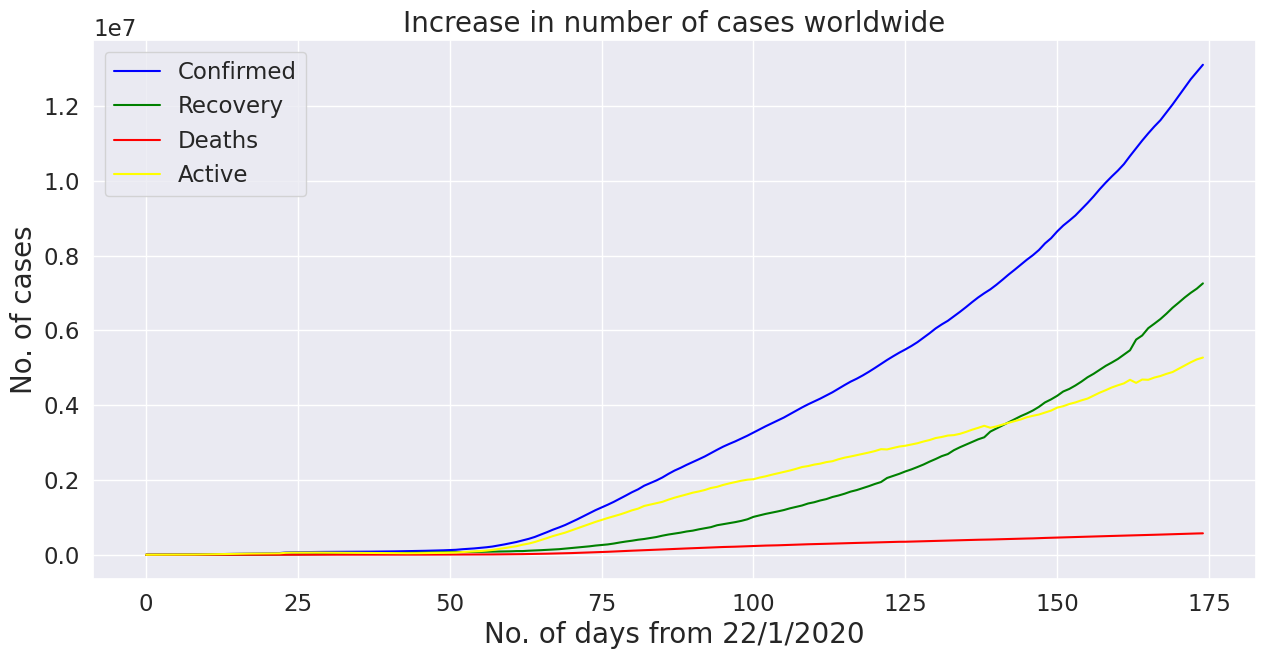

In [ ]:
# Plotting the number of confirmed cases, recovered cases, death cases and active cases worldwide as per the given dataset.

confirm_date = confirm.iloc[:,1:].sum().values.tolist()
recovery_date = recovery.iloc[:,1:].sum().values.tolist()
deaths_date = deaths.iloc[:,1:].sum().values.tolist()
active_date = active.iloc[:,1:].sum().values.tolist()

plt.figure(figsize=(15,7))
plt.plot(confirm_date,color='Blue')
plt.plot(recovery_date,color='Green')
plt.plot(deaths_date,color='Red')
plt.plot(active_date,color='Yellow')

plt.xlabel('No. of days from 22/1/2020',size=20)
plt.ylabel('No. of cases',size=20)
plt.title('Increase in number of cases worldwide',size=20)
plt.legend(['Confirmed','Recovery','Deaths','Active'])
plt.show()

In [ ]:
# Plotting the number of confirmed cases, recovered cases, death cases and active cases worldwide
#as per the given dataset
#in scatterplots
Confirmed = confirm.sum()
Recovered = recovery.sum()
Death = deaths.sum()
Actives = active.sum()
fig = go.Figure()
fig.add_trace(go.Scatter(x=Confirmed.index, y=Confirmed.values, mode = 'lines+markers', name = 'Confirmed',
line = dict(color = "Blue", width = 2 )))
fig.add_trace(go.Scatter(x=Recovered.index, y=Recovered.values, mode = 'lines+markers', name = 'Recovered',
line = dict(color = "Green", width = 2)))
fig.add_trace(go.Scatter(x=Death.index, y=Death.values, mode = 'lines+markers', name = 'Deaths',
line = dict(color = "Red", width = 2)))
fig.add_trace(go.Scatter(x=Actives.index, y=Actives.values, mode = 'lines+markers', name = 'Active',
line = dict(color = "Orange", width = 2)))
fig.update_layout(title = 'Increase in number of cases worldwide', xaxis_tickfont_size = 10,
                  yaxis = dict(title = 'Number of Cases'))

fig.show()


# Observations:

A sharp rise in number of confirmed cases can be seen after 2 months of origin of coronavirus, the number of active cases are more compared to recovered cases, which is not good, but fortunately, the number of deaths are comparatively very less compared to the recovery case. This is a good sign.

In [ ]:
# Finding countries which have more number of cases(confirmed,deaths,recovery and active) currently as per the given dataset

confirm_data = confirm[['Country','Current']].sort_values('Current',ascending = False)
deaths_data = deaths[['Country','Current']].sort_values('Current',ascending = False)
recovery_data = recovery[['Country','Current']].sort_values('Current',ascending = False)
active_data = active[['Country','Current']].sort_values('Current',ascending = False)

In [ ]:
# Top 10 countries with more number of confirmed cases
confirm_data.head(10)

,Country,Current
174,US,3364157
23,Brazil,1884967
79,India,906752
140,Russia,732547
134,Peru,330123
35,Chile,317657
113,Mexico,304435
178,United Kingdom,291691
156,South Africa,287796
81,Iran,259652


In [ ]:
# Top 10 countries with more number of death cases
deaths_data.head(10)

,Country,Current
174,US,135566
23,Brazil,72833
178,United Kingdom,44915
113,Mexico,35491
85,Italy,34967
62,France,30032
158,Spain,28406
79,India,23727
81,Iran,13032
134,Peru,12054


In [ ]:
# Top 10 countries with more number of recovery cases
recovery_data.head(10)

,Country,Current
23,Brazil,1291251
174,US,1031939
79,India,571460
140,Russia,503168
35,Chile,286556
113,Mexico,240101
81,Iran,222539
134,Peru,221008
173,Turkey,195671
85,Italy,195106


In [ ]:
# Top 10 countries with more number of active cases
active_data.head(10)

,Country,Current
174,US,2196652
23,Brazil,520883
79,India,311565
178,United Kingdom,245392
140,Russia,217957
156,South Africa,145383
62,France,100886
134,Peru,97061
13,Bangladesh,86186
37,Colombia,81360


Now, we know the top 10 countries which are having more number of confirmed cases, death cases, recovery cases and
active cases currently. We will visualize it to understand it clearly:

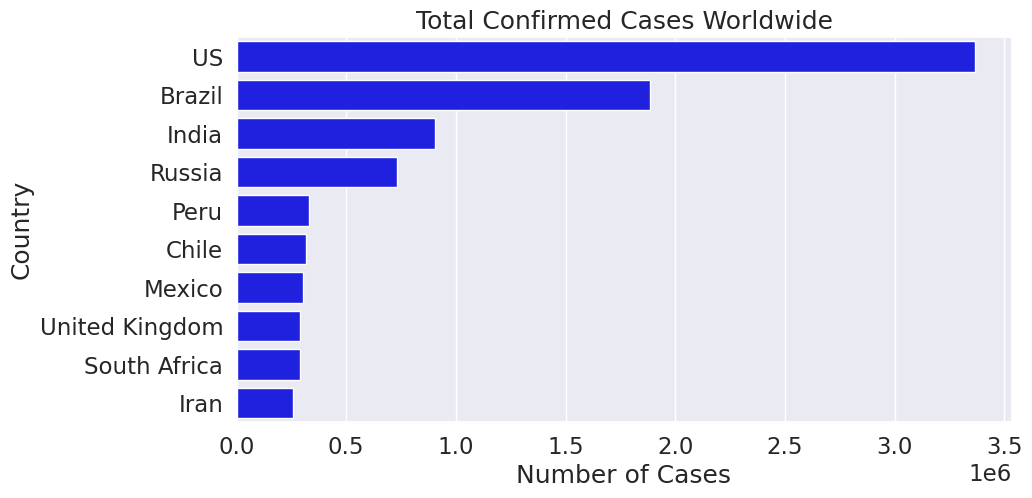

In [ ]:
# Confirmed Cases
sns.set(font_scale=1.5)
plt.figure(figsize=(10,5))
fig= sns.barplot(x='Current', y='Country', data=confirm_data[:10], orient='h',color='Blue')
plt.title('Total Confirmed Cases Worldwide')
fig.set(xlabel ='Number of Cases', ylabel ='Country')
plt.show()

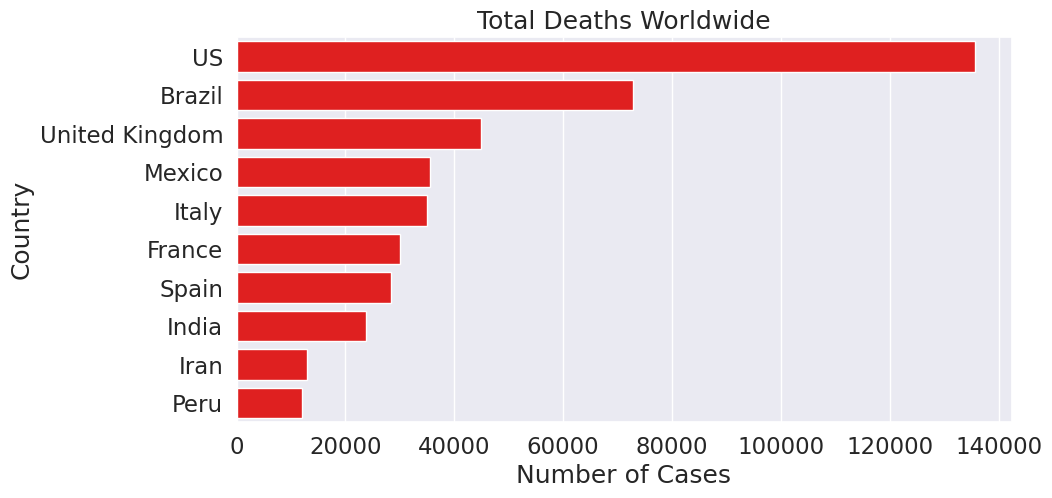

In [ ]:
# Death Cases
plt.figure(figsize=(10,5))
fig= sns.barplot(x='Current', y='Country', data=deaths_data[:10], orient='h',color='Red')
plt.title('Total Deaths Worldwide')
fig.set(xlabel ='Number of Cases', ylabel ='Country')
plt.show()

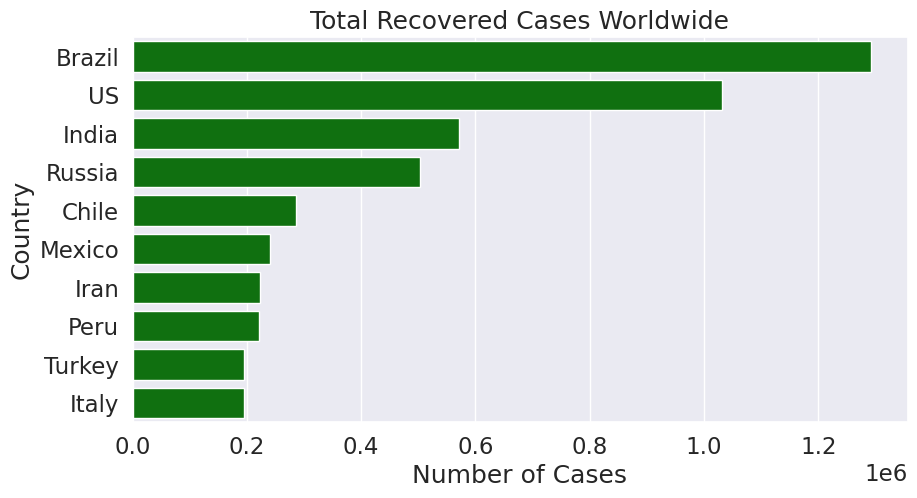

In [ ]:
# Recovery Cases
plt.figure(figsize=(10,5))
fig= sns.barplot(x='Current', y='Country', data=recovery_data[:10], orient='h',color='Green')
plt.title('Total Recovered Cases Worldwide')
fig.set(xlabel ='Number of Cases', ylabel ='Country')
plt.show()

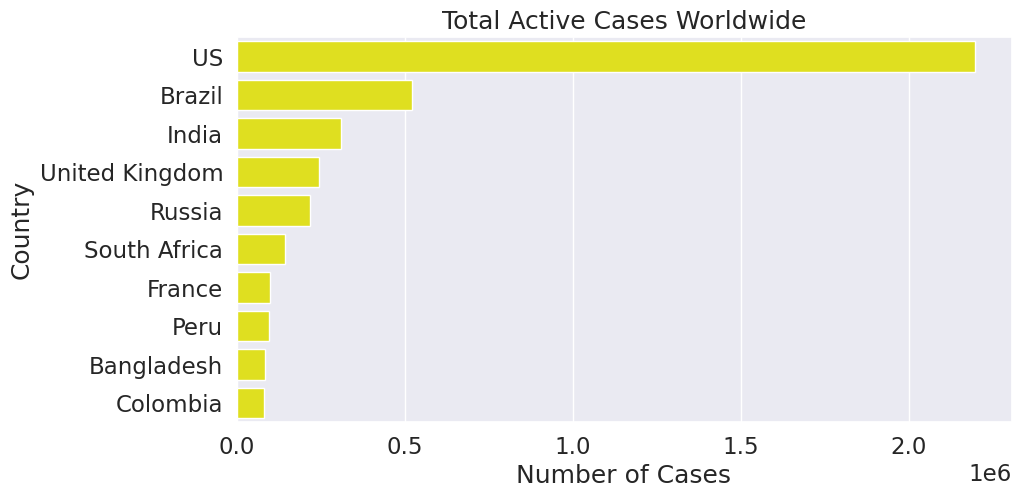

In [ ]:
# Active Cases
plt.figure(figsize=(10,5))
fig= sns.barplot(x='Current', y='Country', data=active_data[:10], orient='h',color='Yellow')
plt.title('Total Active Cases Worldwide')
fig.set(xlabel ='Number of Cases', ylabel ='Country')
plt.show()

# Observations:
Countries like US, India, Brazil are having more number of confirm cases and death cases as per the given
dataset. In active cases also, US, India are there in top 5 countries. This is a bad sign especially for US as well as India.
But fortunately, in recovery cases, India and Brazil is on Top which is a good sign.

# To find the impact of Covid-19 in wealthy countries:

List of top 5 countries which are wealthy are:
Luxembourg (GDP per capita :120,962.2),
Singapore (GDP per capita :101,936.7),
Qatar (GDP per capita :93,851.7),
Ireland (GDP per capita :87,212)
Switzerland (GDP per capita :70,726.6).

Now, I will find whether these 5 countries, which are wealthy are having more number of cases or not by using the given dataset.
    

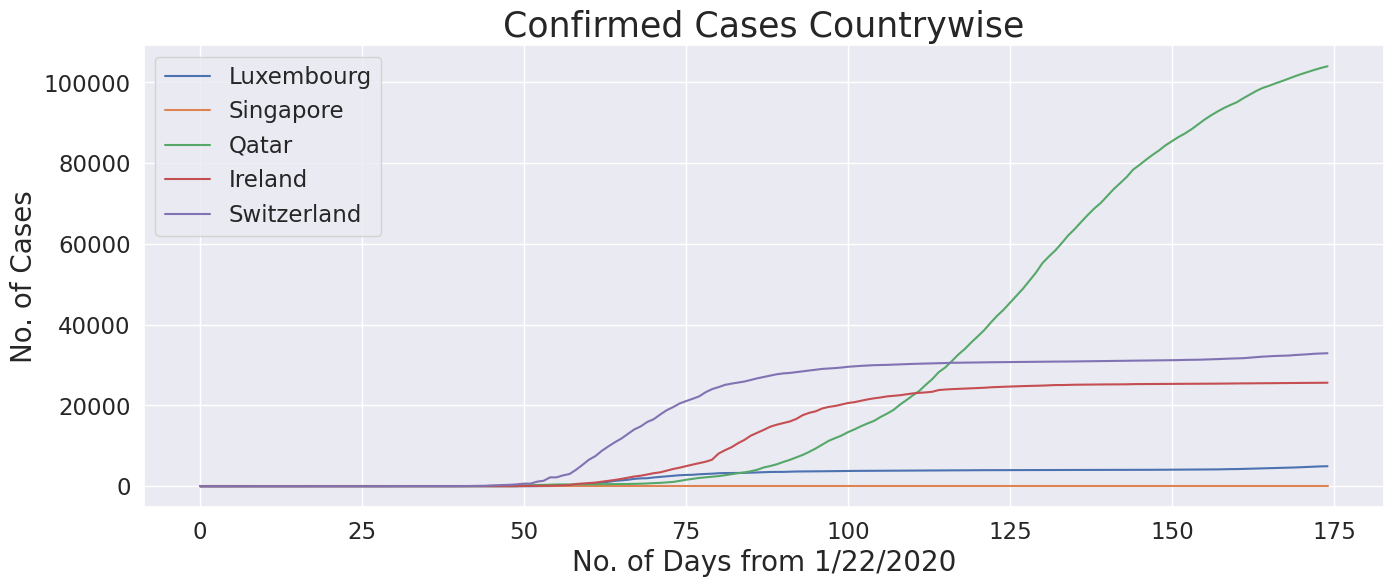

In [ ]:
#Plotting the number of Confirmed cases countrywise

Luxembourg_confirm = confirm[confirm.Country == 'Luxembourg'].iloc[:,1:].sum().values.tolist()
Singapore_confirm = confirm[confirm.Country == ' Singapore'].iloc[:,1:].sum().values.tolist()
Qatar_confirm = confirm[confirm.Country == 'Qatar'].iloc[:,1:].sum().values.tolist()
Ireland_confirm = confirm[confirm.Country == 'Ireland'].iloc[:,1:].sum().values.tolist()
Switzerland_confirm = confirm[confirm.Country == 'Switzerland'].iloc[:,1:].sum().values.tolist()
plt.figure(figsize=(16,6))
plt.plot(Luxembourg_confirm)
plt.plot(Singapore_confirm)
plt.plot(Qatar_confirm)
plt.plot(Ireland_confirm)
plt.plot(Switzerland_confirm)
plt.title('Confirmed Cases Countrywise', size=25)
plt.xlabel('No. of Days from 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['Luxembourg', 'Singapore','Qatar','Ireland','Switzerland'])
plt.show()


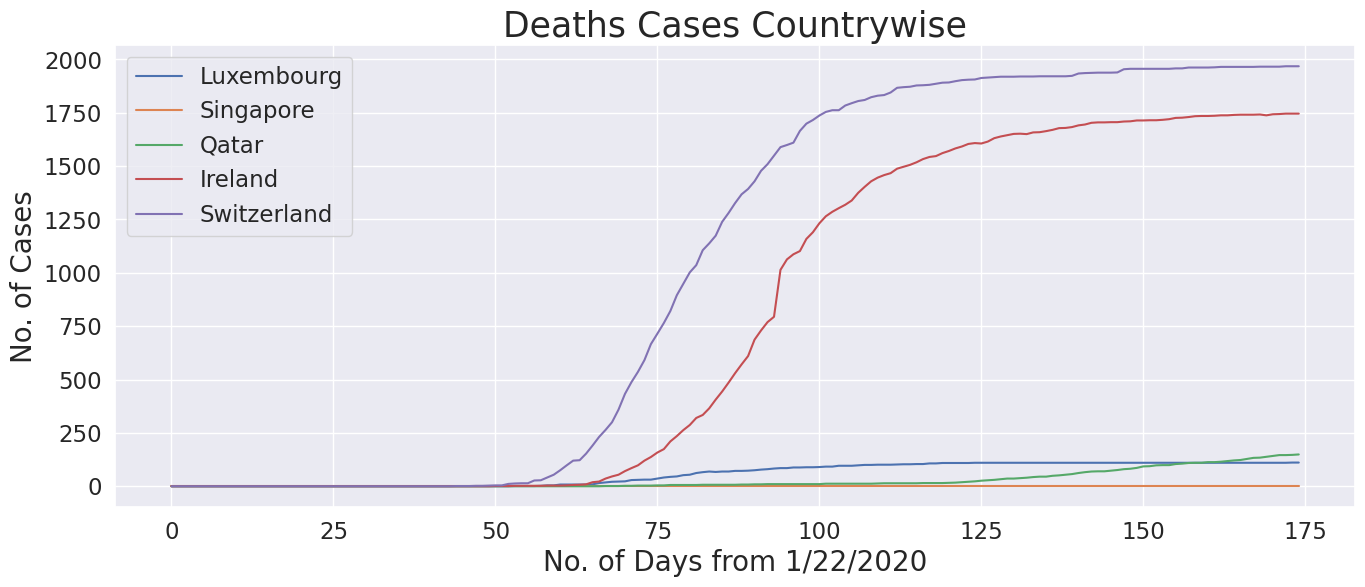

In [ ]:
#Plotting the number of death cases countrywise
Luxembourg_deaths = deaths[deaths.Country == 'Luxembourg'].iloc[:,1:].sum().values.tolist()
Singapore_deaths = deaths[deaths.Country == ' Singapore'].iloc[:,1:].sum().values.tolist()
Qatar_deaths = deaths[deaths.Country == 'Qatar'].iloc[:,1:].sum().values.tolist()
Ireland_deaths = deaths[deaths.Country == 'Ireland'].iloc[:,1:].sum().values.tolist()
Switzerland_deaths = deaths[deaths.Country == 'Switzerland'].iloc[:,1:].sum().values.tolist()
plt.figure(figsize=(16,6))
plt.plot(Luxembourg_deaths)
plt.plot(Singapore_deaths)
plt.plot(Qatar_deaths)
plt.plot(Ireland_deaths)
plt.plot(Switzerland_deaths)
plt.title('Deaths Cases Countrywise', size=25)
plt.xlabel('No. of Days from 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['Luxembourg', 'Singapore','Qatar','Ireland','Switzerland'])
plt.show()

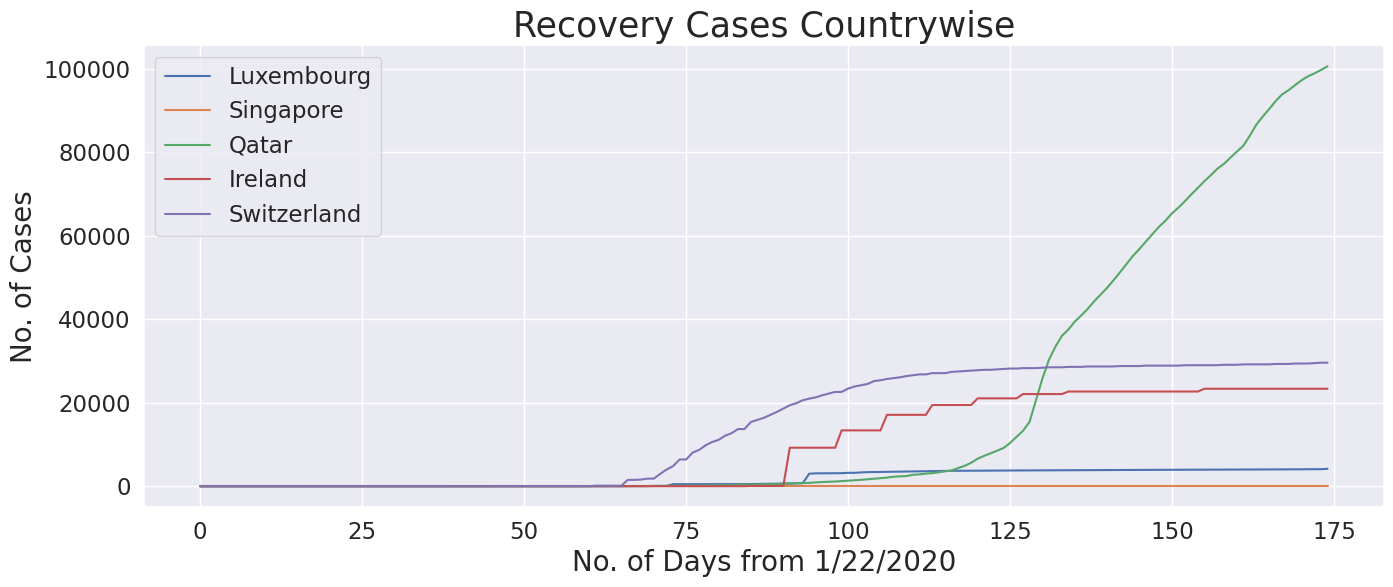

In [ ]:
#Plotting the number of recovery cases countrywise
Luxembourg_recovery = recovery[recovery.Country == 'Luxembourg'].iloc[:,1:].sum().values.tolist()
Singapore_recovery = recovery[recovery.Country == ' Singapore'].iloc[:,1:].sum().values.tolist()
Qatar_recovery = recovery[recovery.Country == 'Qatar'].iloc[:,1:].sum().values.tolist()
Ireland_recovery = recovery[recovery.Country == 'Ireland'].iloc[:,1:].sum().values.tolist()
Switzerland_recovery = recovery[recovery.Country == 'Switzerland'].iloc[:,1:].sum().values.tolist()
plt.figure(figsize=(16,6))
plt.plot(Luxembourg_recovery)
plt.plot(Singapore_recovery)
plt.plot(Qatar_recovery)
plt.plot(Ireland_recovery)
plt.plot(Switzerland_recovery)
plt.title('Recovery Cases Countrywise', size=25)
plt.xlabel('No. of Days from 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['Luxembourg', 'Singapore','Qatar','Ireland','Switzerland'])
plt.show()

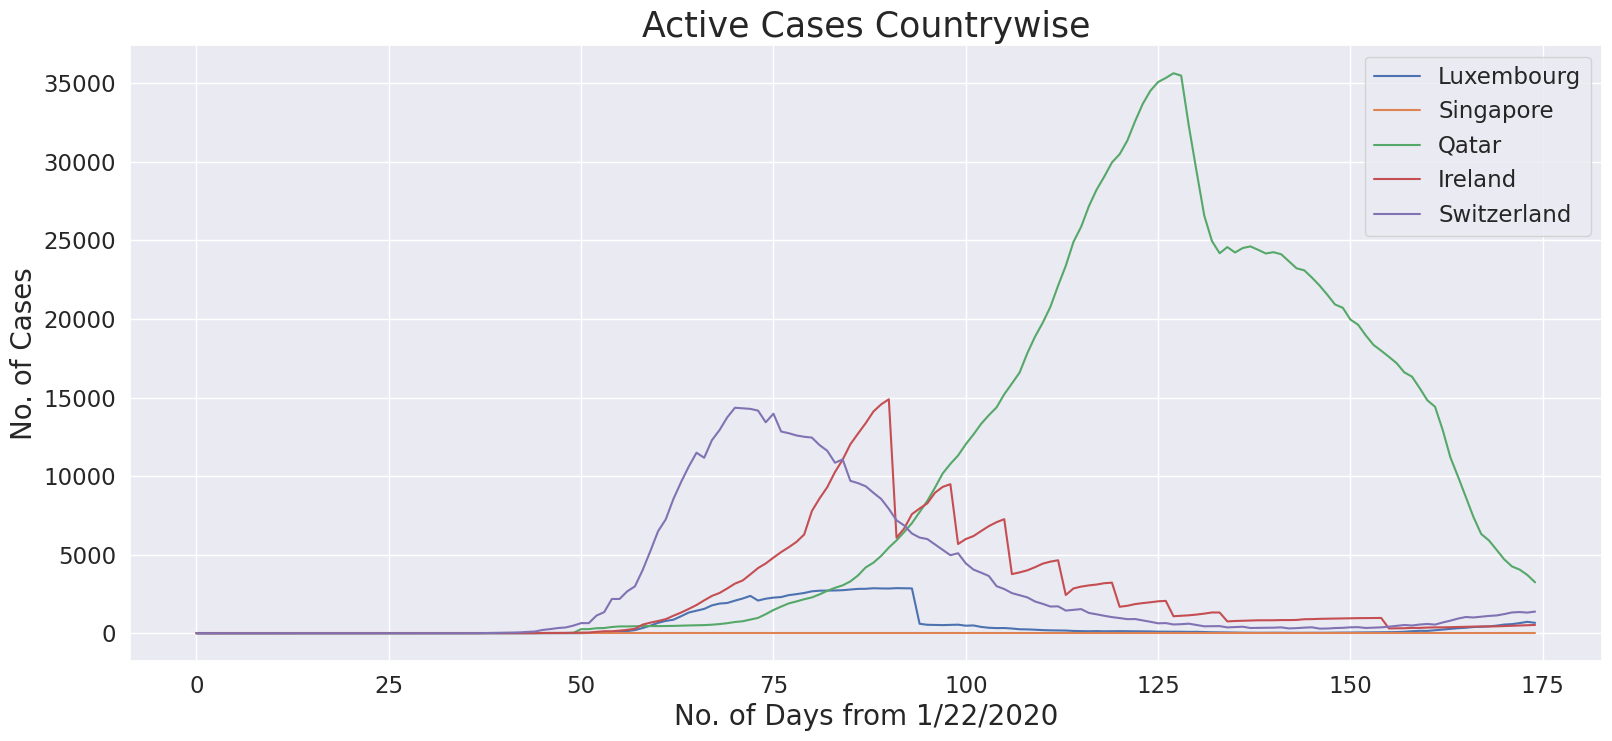

In [ ]:
#Plotting the number of active cases countrywise
plt.figure(figsize=(19,8))
Luxembourg_active = active[active.Country == 'Luxembourg'].iloc[:,1:].sum().values.tolist()
Singapore_active = active[active.Country == ' Singapore'].iloc[:,1:].sum().values.tolist()
Qatar_active = active[active.Country == 'Qatar'].iloc[:,1:].sum().values.tolist()
Ireland_active = active[active.Country == 'Ireland'].iloc[:,1:].sum().values.tolist()
Switzerland_active = active[active.Country == 'Switzerland'].iloc[:,1:].sum().values.tolist()

plt.plot(Luxembourg_active)
plt.plot(Singapore_active)
plt.plot(Qatar_active)
plt.plot(Ireland_active)
plt.plot(Switzerland_active)
plt.title('Active Cases Countrywise', size=25)
plt.xlabel('No. of Days from 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['Luxembourg', 'Singapore','Qatar','Ireland','Switzerland'])
plt.show()

# Observations:

In Switzerland, number of confirmed cases and active cases are more but death cases are less and recovery cases are high. Singapore is having more impact of Covid-19 whereas Luxembourg is having less impact of Covid-19 as compared to other countries. Although in Qatar, there are more number of confirmed cases, recovery cases in Qatar are more, death cases and active cases are less in Qatar. In Ireland, number of confirmed cases and active cases are more!

# Which countries are safe and which are not safe:


With the help of the given dataset, I have shown in worldmap, which will be easier to know which countries are having more impact of Covid-19 and which countries are having less impact of Covid-19.

In [ ]:
# Showing Confirmed Cases in worldmap
fig = px.choropleth(confirm_data, locations="Country", locationmode='country names',
                  color=confirm_data['Current'], hover_name="Country",
                  title='Countries with Confirmed Cases',hover_data=['Current'], color_continuous_scale="blues")
fig.show()

In [ ]:
# Showing Death Cases in worldmap
fig = px.choropleth(deaths_data, locations="Country", locationmode='country names',
                  color=deaths_data['Current'], hover_name="Country",
                  title='Countries with Death Cases',hover_data=['Current'], color_continuous_scale="peach")
fig.show()

In [ ]:
# Showing Recovered Cases in worldmap
fig = px.choropleth(recovery_data, locations="Country", locationmode='country names',
                  color=recovery_data['Current'], hover_name="Country",
                  title='Countries with Recovered Cases',hover_data=['Current'], color_continuous_scale="emrld")
fig.show()

In [ ]:
# Showing Active Cases in worldmap
fig = px.choropleth(active_data, locations="Country", locationmode='country names',
                  color=active_data['Current'], hover_name="Country",
                  title='Countries with Active Cases',hover_data=['Current'], color_continuous_scale="sunset")
fig.show()

# Observations:
Countries like India, US, Brazil are having more number of confirmed cases as well as death cases, and in countries like China, Russia, Australia, number of confirmed cases and death cases are low.
In US, number of recovery cases are too low but active cases are too high. In India and Brazil, it is opposite, there are less number of active cases and more number of recovery cases. In Russia also, number of recovery cases are more than active cases. While in countries like China, Australia, number of neither the number of active cases are high nor the recovery cases.


# Prediction:

In [ ]:
#Linear Regression

total_confirm = np.array(confirm_date).reshape(-1,1)
total_deaths = np.array(deaths_date).reshape(-1,1)
total_recovery = np.array(recovery_date).reshape(-1,1)
total_active = np.array(active_date).reshape(-1,1)
days = [ i for i in range(confirm.shape[1] - 1) ]
dates = np.array([i for i in range(len(days))]).reshape(-1, 1)

def linear_plot(x,y,reg,title):
    plt.figure(figsize=(10,6))
    plt.scatter(x,y,color='red')
    plt.plot(x,reg)
    plt.title(title)

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(dates[50:],
total_confirm[50:], test_size=0.14, shuffle=False)

reg = LinearRegression()
reg.fit(X_train_confirmed, y_train_confirmed);

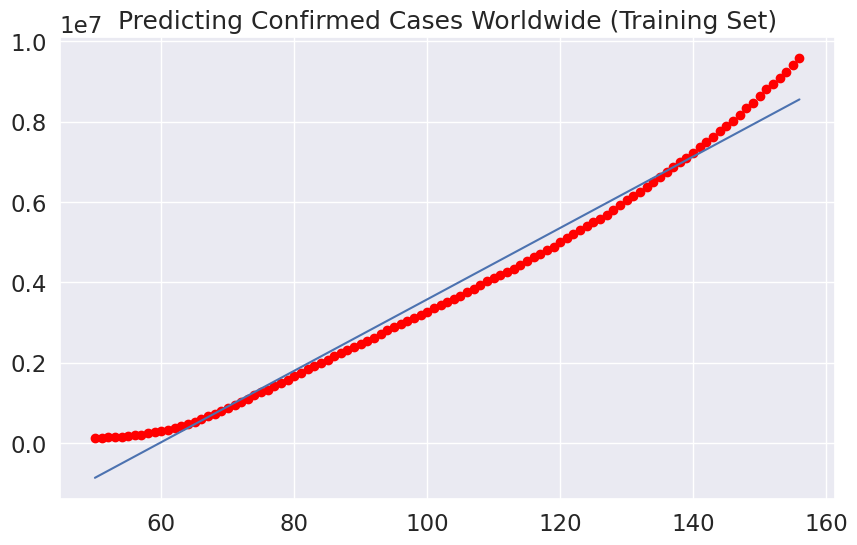

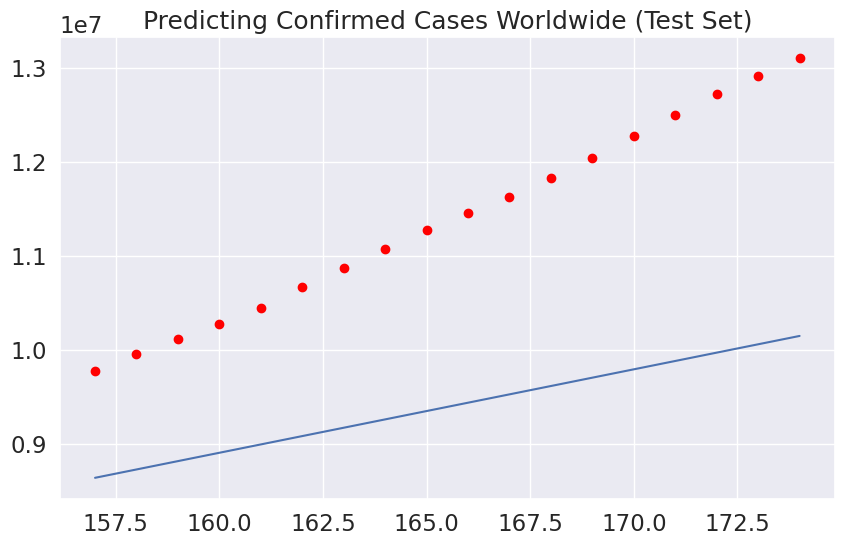

In [ ]:
# Plot training set
linear_plot(X_train_confirmed,y_train_confirmed,reg.predict(X_train_confirmed),
'Predicting Confirmed Cases Worldwide (Training Set)')

# Plot test set
linear_plot(X_test_confirmed,y_test_confirmed,reg.predict(X_test_confirmed),
'Predicting Confirmed Cases Worldwide (Test Set)')

# Observations:
The test set predictions are not very accurate as training set predictions.
As the total confirmed cases has a parabolic curve, trying polynomial linear regression.

# Polynomial Linear Regression:



Confirmed cases;

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X_train_confirmed, X_test_confirmed, y_train_confirmed are your datasets

# Step 1: Transform the data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.transform(X_test_confirmed)

# Step 2: Normalize the data if necessary (optional but recommended)
scaler = StandardScaler()
poly_X_train_confirmed = scaler.fit_transform(poly_X_train_confirmed)
poly_X_test_confirmed = scaler.transform(poly_X_test_confirmed)

# Step 3: Perform polynomial regression
poly_reg = LinearRegression(fit_intercept=False)
poly_reg.fit(poly_X_train_confirmed, y_train_confirmed)

# Predicting the results
y_pred_confirmed = poly_reg.predict(poly_X_test_confirmed)

# Displaying results (optional)
print("Coefficients:", poly_reg.coef_)
print("Intercept:", poly_reg.intercept_)


Coefficients: [[ 0.00000000e+00 -4.48852817e+07  1.89051551e+08 -2.95357202e+08
   2.09953040e+08 -5.60128416e+07]]
Intercept: 0.0


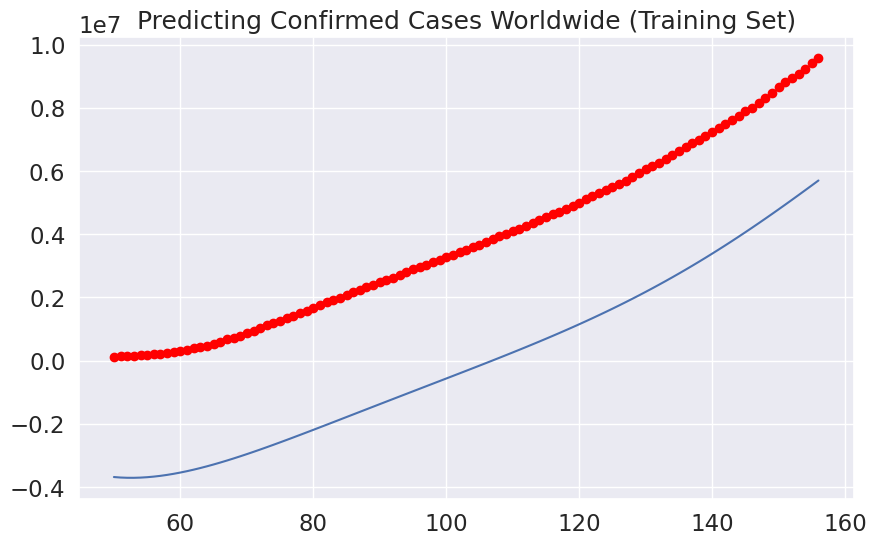

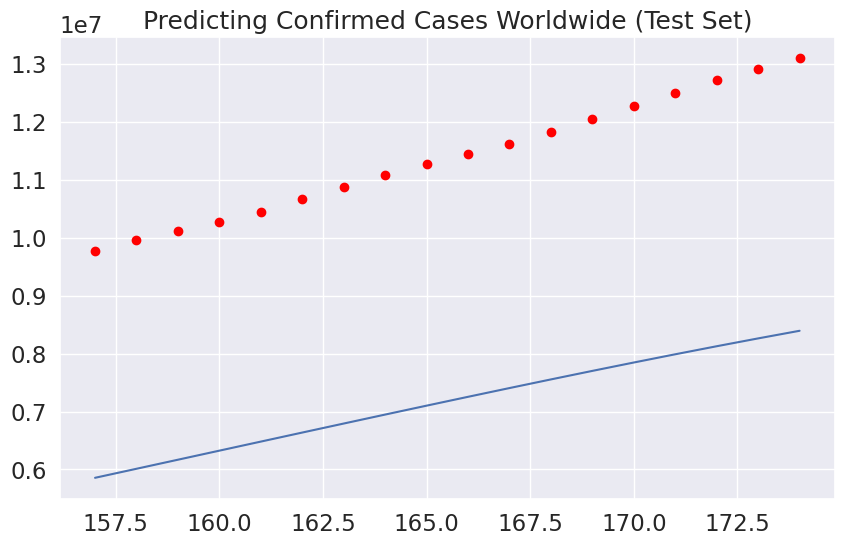

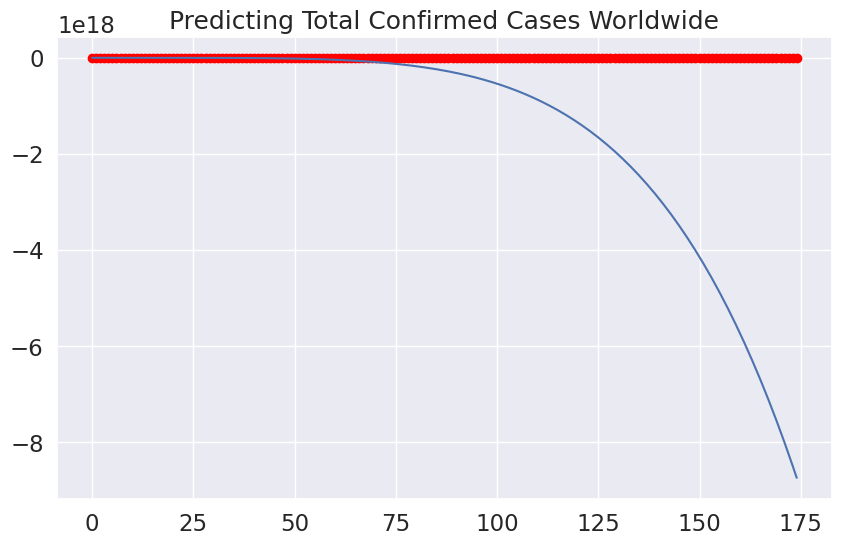

In [ ]:
# Plot training set
linear_plot(X_train_confirmed,y_train_confirmed,poly_reg.predict(poly_X_train_confirmed),
'Predicting Confirmed Cases Worldwide (Training Set)')

# Plot test set
linear_plot(X_test_confirmed,y_test_confirmed,poly_reg.predict(poly_X_test_confirmed),
'Predicting Confirmed Cases Worldwide (Test Set)')

# Plot total cases
linear_plot(dates,total_confirm,poly_reg.predict(poly.fit_transform(dates)),
'Predicting Total Confirmed Cases Worldwide')

Death Cases:

In [ ]:
#For Death Cases
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(dates[60:], total_deaths[60:],
test_size=0.14, shuffle=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X_train_deaths, X_test_deaths, y_train_deaths are your datasets

# Step 1: Transform the data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths = poly.fit_transform(X_train_deaths)
poly_X_test_deaths = poly.transform(X_test_deaths)

# Step 2: Normalize the data (optional but recommended)
scaler = StandardScaler()
poly_X_train_deaths = scaler.fit_transform(poly_X_train_deaths)
poly_X_test_deaths = scaler.transform(poly_X_test_deaths)

# Step 3: Perform polynomial regression
poly_reg = LinearRegression(fit_intercept=False)
poly_reg.fit(poly_X_train_deaths, y_train_deaths)

# Predicting the results
y_pred_deaths = poly_reg.predict(poly_X_test_deaths)

# Displaying results (optional)
print("Coefficients:", poly_reg.coef_)
print("Intercept:", poly_reg.intercept_)


Coefficients: [[        0.          -5520171.24700862  22902486.57492261
  -35114027.13823323  24146028.86250534  -6273656.88120934]]
Intercept: 0.0


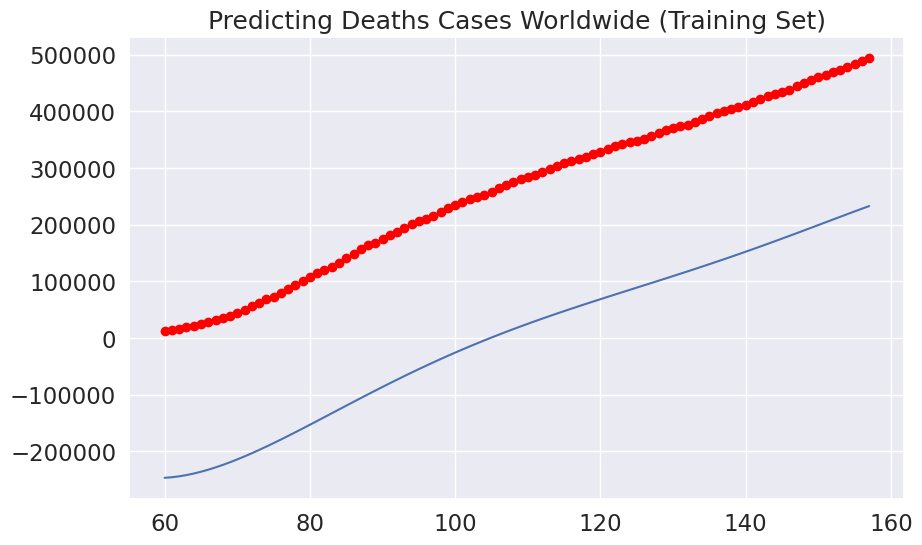

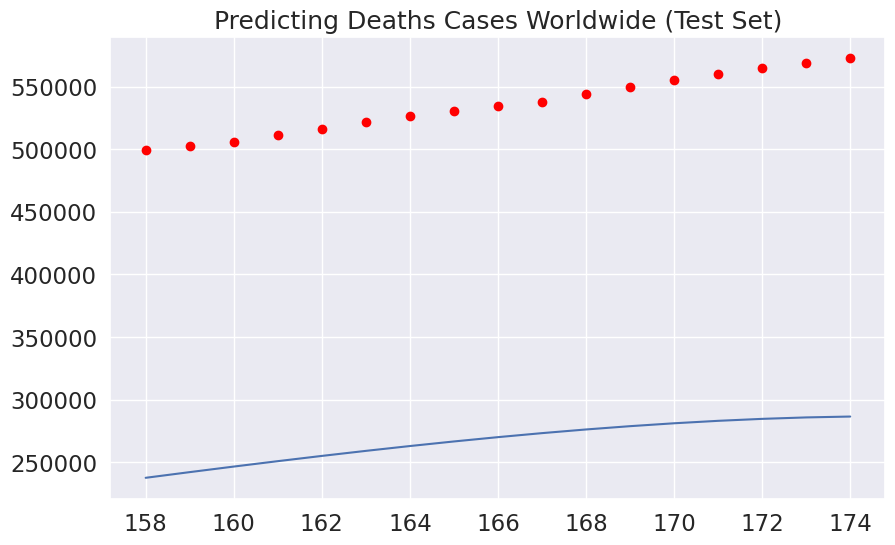

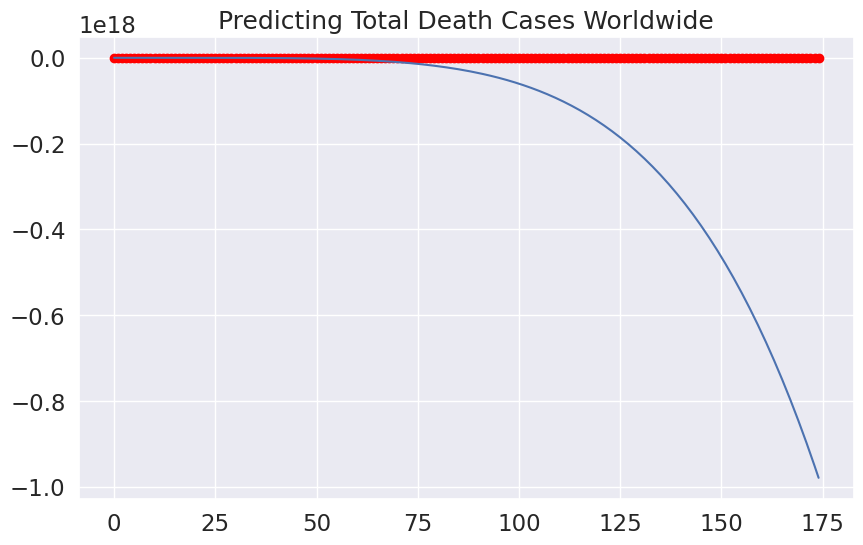

In [ ]:
# Plot training set
linear_plot(X_train_deaths,y_train_deaths,poly_reg.predict(poly_X_train_deaths),'Predicting Deaths Cases Worldwide (Training Set)')

# Plot test set
linear_plot(X_test_deaths,y_test_deaths,poly_reg.predict(poly_X_test_deaths),'Predicting Deaths Cases Worldwide (Test Set)')

# Plot total cases
linear_plot(dates,total_deaths,poly_reg.predict(poly.fit_transform(dates)),'Predicting Total Death Cases Worldwide')